In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
def draw_triangle(ax, depth, x, y, size):
    if depth == 0:
        points = [[x, y], [x + size, y], [x + size/2, y + size]]
        color = [random.random(), random.random()]
        ax.fill([point[0] for point in points], [point[1] for point in points], color)
    else:
        draw_triangle(ax, depth-1, x, y, size/2)
        draw_triangle(ax, depth-1, x + size/2, y, size/2)
        draw_triangle(ax, depth-1, x + size/4, y + size/2, size/2)

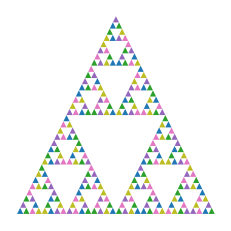

In [3]:
depth = 5
fig, ax = plt.subplots()
draw_triangle(ax, depth, 0, 0, 1)
ax.set_aspect('equal', 'box')
plt.axis('off')
plt.show()

In [4]:
def draw_spiral(angle, radius, depth, color):
    if depth == 0:
        return []
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    plt.plot([0, x], [0, y], color=color, linewidth=1)
    new_radius = radius * 0.95
    new_angle = angle + np.pi/8
    new_color = [np.random.uniform(0.85, 0.95), np.random.uniform(0.75, 0.85), np.random.uniform(0.55, 0.65)]
    return [(x, y)] + draw_spiral(new_angle, new_radius, depth-1, new_color)

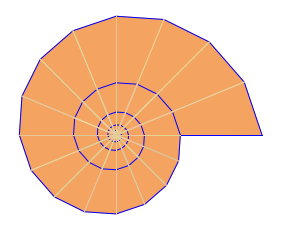

In [5]:
depth = 100
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.axis('off')
line, = ax.plot([], [], color='b', linewidth=1)
fill = ax.fill([], [], color='sandybrown')
def update(frame):
    spiral_points = draw_spiral(frame * np.pi/180, 1, depth, 'b')
    line.set_data(*zip(*spiral_points))
    
    x_values, y_values = zip(*spiral_points)
    fill[0].set_xy(np.column_stack((x_values, y_values)))
    
    return line, fill[0]
ani = animation.FuncAnimation(fig, update, frames=360, interval=50, blit=True)
plt.show()